In [15]:
# Importing all libraries
# You can install all libraries by "pip install -r requirements.txt"
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns
import pandas as pd 
from nltools.data import Adjacency
import networkx as nx

In [16]:
def load_txt(directory):
#     This function reads all files in one directory 
#     and returns 150 * 300 array (there are some exceptions) (row: one brain region, column: time)
    dir_name = str(directory)
    roi = list()
    if directory.is_dir():
        for i in range(2, 152):
            file = dir_name + "/" + "roi" + str(i) + ".txt"
            roi.append(np.loadtxt(file))
    return np.array(roi)

In [54]:
def split_roi_into_windows1(roi, timepoints=60, splits=50):
    roi_split = []
    row, col = roi.shape
    num_windows = int(row / splits) #number of windows needed to skip
    start_index = 0
    for i in range(splits):
        if i == splits - 1:
            roi_split.append(roi[:, range(row-timepoints, row)])
        else:
            roi_split.append(roi[:, range(start_index, start_index + timepoints)])
        start_index += num_windows
    return roi_split 

In [55]:
def split_roi_into_windows(roi, timepoints=60, splits=50, num_window=1):
    roi_split = []
    row, col = roi.shape
    start_index = 0
    for i in range(splits):
        roi_split.append(roi[:, range(start_index, start_index + timepoints)])
        start_index += num_window
    return roi_split 

In [56]:
def calculate_threshold(roi, top=15):
    #calculate threshold 
    roi_T = roi.T
    roi_pd = pd.DataFrame(roi_T).abs()
    corr = roi_pd.corr(method="pearson") #calculate corration using pearson
    threshold = np.percentile(corr, 100 - top)
    return threshold

In [64]:
def apply_threshold(roi_split, threshold):
    siz = len(roi_split)
    roi_corr = []
    for i in range(siz):
        corr = np.corrcoef(roi_split[i])
        print(i,corr.shape,roi_split[i].shape)
        corr[np.abs(corr) < threshold] = 0.0
        roi_corr.append(corr)
    return roi_corr

In [65]:
def build_graph(roi_corr, threshold):
    # Build graph 
    graph_list = []
    siz = len(roi_corr)
    for i in range(siz):
        adj_roi = Adjacency(roi_corr[i], matrix_type='similarity')
        thresholded_roi = adj_roi.threshold(upper=threshold, binarize=False)
        g = thresholded_roi.to_graph()
        graph_list.append(g)
    return graph_list

In [66]:
import bct 
from bct.algorithms import community_louvain, ci2ls

def flexibility(list_graph):
    siz = len(list_graph)
    nodes = list_graph[0].number_of_nodes()
    #convert nx to np.array 
    graph_array = list(nx.convert_matrix.to_numpy_array(list_graph[i]) for i in range(siz))
    possible_changes = siz - 1
    cl = list()
    initial_modularity = community_louvain(graph_array[0], gamma=1, ci=None, B='modularity', seed=None)
    cl.append(initial_modularity[0])
    total_changes = np.zeros(nodes)
    for i in range(1, siz):
        next_modularity = community_louvain(graph_array[i], ci=cl[i-1], B='modularity', seed=None)
        cl.append(next_modularity[0])
        diff = np.abs(next_modularity[0] - cl[i-1])
        diff[diff>0] = 1
        total_changes += diff
    return total_changes / possible_changes

In [67]:
def calculate_sdv(arr: np.ndarray):
    return np.std(arr)

In [68]:
def calculate_cov(arr: np.ndarray):
    return np.cov(arr)

In [69]:
def calculate_var(arr: np.ndarray):
    return np.var(arr)

In [70]:
from pathlib import Path 
import os
from collections import defaultdict
data_path = Path("/Users/niva.ranavat/UCI Research/Data")
result_dict = dict()
drugs_list = ("SAL", )
timepoints = [30,60,90,120,150]
for i in drugs_list:
    result_dict[i] = defaultdict(list) #defaultdict(np.ndarray)

for dir in data_path.iterdir():
    if dir.is_dir():
        split_roi = [None] * len(timepoints)
        drug = os.path.basename(dir)
        if drug.startswith(drugs_list):
            type_drug = drug.split('_')[0]
            roi = load_txt(dir)
            threshold = calculate_threshold(roi)
            for i in range(len(timepoints)):
                split_roi[i] = split_roi_into_windows(roi, timepoints[i])
            for i in range(len(timepoints)):
                corr = apply_threshold(split_roi[i], threshold)
                graph_list = build_graph(corr, threshold)
                flex = flexibility(graph_list)
                result_dict[type_drug][drug].append((i, flex))
            

# print("original done")
# import utils
# result_dict2, flexibility,fig = utils.calculate_flexibility(data_path, drugs_list, timepoints)

# print("copied one done")
# for base, f in result_dict2["SAL"].items():
#     for x in range(len(f)):
#         print(base,f[x][0], f[x][1] - result_dict["SAL"][base][x][1])

0 (150, 150) (150, 30)
1 (150, 150) (150, 30)
2 (150, 150) (150, 30)
3 (150, 150) (150, 30)
4 (150, 150) (150, 30)
5 (150, 150) (150, 30)
6 (150, 150) (150, 30)
7 (150, 150) (150, 30)
8 (150, 150) (150, 30)
9 (150, 150) (150, 30)
10 (150, 150) (150, 30)
11 (150, 150) (150, 30)
12 (150, 150) (150, 30)
13 (150, 150) (150, 30)
14 (150, 150) (150, 30)
15 (150, 150) (150, 30)
16 (150, 150) (150, 30)
17 (150, 150) (150, 30)
18 (150, 150) (150, 30)
19 (150, 150) (150, 30)
20 (150, 150) (150, 30)
21 (150, 150) (150, 30)
22 (150, 150) (150, 30)
23 (150, 150) (150, 30)
24 (150, 150) (150, 30)
25 (150, 150) (150, 30)
26 (150, 150) (150, 30)
27 (150, 150) (150, 30)
28 (150, 150) (150, 30)
29 (150, 150) (150, 30)
30 (150, 150) (150, 30)
31 (150, 150) (150, 30)
32 (150, 150) (150, 30)
33 (150, 150) (150, 30)
34 (150, 150) (150, 30)
35 (150, 150) (150, 30)
36 (150, 150) (150, 30)
37 (150, 150) (150, 30)
38 (150, 150) (150, 30)
39 (150, 150) (150, 30)
40 (150, 150) (150, 30)
41 (150, 150) (150, 30)
42

KeyboardInterrupt: 

In [16]:
#Now result_dict stores all flexibilities
#e.g. result_dict["COL"]["COL_01"][0] = COL_01 flexibility ndarray with timepoints 30
#check standard deviation
def print_sdv(result_dict, tp_or_shifts, drug=None):
    result_drug = dict()
    if drug:
        result_drug = result_dict[drug]
    else:
        result_drug = result_dict
    for drug_type, list_flex in sorted(result_drug.items()):
        print(drug_type)
        for i, flex in list_flex:
            sdv = calculate_sdv(flex)
            print("tp_or_shifts " + str(tp_or_shifts[i]) + ": " + str(sdv))
        print()

In [17]:
from statistics import mean
#create panda Dataframe 
def tp_dict(result_dict, tp_or_shifts, drug=None):
    result_drug = dict()
    if drug:
        result_drug = result_dict[drug]
    else:
        result_drug = result_dict
    len_lines = len(result_drug)
    plt.figure(figsize=(10,10))
    sdv_list = list()
    cov_list = list()
    fmean_list = list()
    for index, (drug_type, list_flex) in enumerate(sorted(result_drug.items())):
        sdv = [0.0] * len(tp_or_shifts)
        cov = [0.0] * len(tp_or_shifts)
        fmean = [0.0] * len(tp_or_shifts)
        for i, flex in list_flex:
            fmean[i] = np.mean(flex)
            sdv[i] = calculate_sdv(flex)
            #need to calculate the coefficient of variance 
            cov[i] = sdv[i]/np.mean(flex)
        sdv_list.append(sdv)
        cov_list.append(cov)
        fmean_list.append(fmean)
    tp_sdv_list = list()
    tp_cov_list = list()
    tp_mean_list = list()
    for i in range(len(tp_or_shifts)):
        s = list(sdv[i] for sdv in sdv_list)
        tp_sdv_list.append(s)
        c = list(cov[i] for cov in cov_list)
        tp_cov_list.append(c)
        m = list(fmean[i] for fmean in fmean_list)
        tp_mean_list.append(m)
    temp_dict1 = dict()
    temp_dict2 = dict()
    temp_dict3 = dict()
    for i in range(len(tp_or_shifts)):
        temp_dict1[tp_or_shifts[i]] = tp_sdv_list[i]
        temp_dict2[tp_or_shifts[i]] = tp_cov_list[i]
        temp_dict3[tp_or_shifts[i]] = tp_mean_list[i]
    return (temp_dict1, temp_dict2,temp_dict3)

In [18]:
def box_plot(tp_dict):
    df = pd.DataFrame(data=tp_dict)
    plt.figure(figsize=(8,8))
    sns.boxplot(data=df, 
                width=0.5, 
                color='lightgray')
    sns.stripplot(data=df,
                  size=5,
                  jitter=True)
    

{30: [0.03008495229624001, 0.03167497717148953, 0.02848350579321656, 0.019245329586876195, 0.03634563435611733, 0.02583458166295058, 0.023770229966542534, 0.030822858252681846, 0.03447201301946468, 0.026730452659031973, 0.037034803332460585, 0.03356548341792495], 60: [0.0323880973081096, 0.02725336819593215, 0.024451973817158405, 0.02221523329406183, 0.029965658225171467, 0.027924320750712644, 0.02663506387816584, 0.03372283881777403, 0.027388535731040643, 0.030684419829138398, 0.027657892993545746, 0.032175935899897166], 90: [0.034947982341731416, 0.025124061649822296, 0.03072541439628902, 0.026635063878165843, 0.024001557942245302, 0.03183673469387755, 0.03274957392193248, 0.03431161962698909, 0.024294001901517755, 0.025587275865077284, 0.027516649426301172, 0.029630204230317817], 120: [0.030914307150544013, 0.023540167351164265, 0.025199100740767835, 0.028147157640241085, 0.02801168581304853, 0.02716356429710177, 0.027219386426860618, 0.025453451610707088, 0.026376317422699608, 0.02

<Figure size 720x720 with 0 Axes>

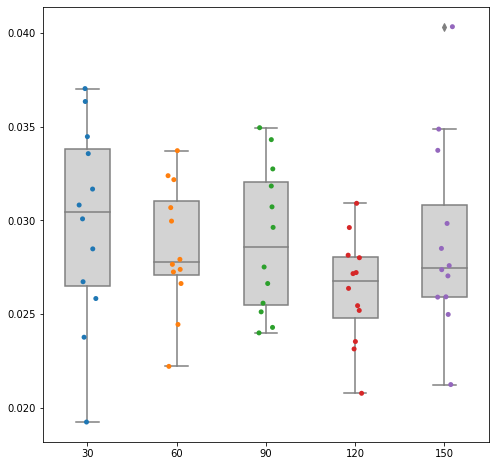

In [19]:
sdv, cov, fmean = tp_dict(result_dict, [30,60,90,120,150], "SAL")
box_plot(sdv)
plt.savefig("sdv.jpg")
print(sdv)

{30: [0.5555889431592063, 0.4591934560363867, 0.35543933375236286, 0.38127539747584915, 0.5858342379768913, 0.3891069164399319, 0.3670403156598479, 0.5318028360497924, 0.7197991354916632, 0.44652006146337503, 0.6022252311804985, 0.5410225945652377], 60: [0.6630989281743888, 0.8902766944004501, 0.7814000328526707, 0.611542938993837, 0.45980707297496937, 1.0011890610621363, 1.0039370231000972, 0.8047495626968804, 1.1569295265698203, 0.8809784599381533, 0.5420947026734966, 0.9061039420085985], 90: [0.8950093038736094, 0.8393720596645179, 0.9409658158863513, 0.8700787533534178, 0.7910827393520314, 1.4444444444444446, 1.2218749661228616, 0.7005289007176939, 0.7258573738868112, 0.9846412440226074, 0.6440999149150116, 1.3526832366014656], 120: [1.076872784627955, 0.5925350343529362, 0.6475992672889636, 0.827526434623088, 1.1374911089829098, 1.0909956152114648, 1.3797413119822453, 0.5502437333491091, 0.7880728986050495, 1.1118989901726892, 0.535878047343904, 1.81429508808977], 150: [1.42400062

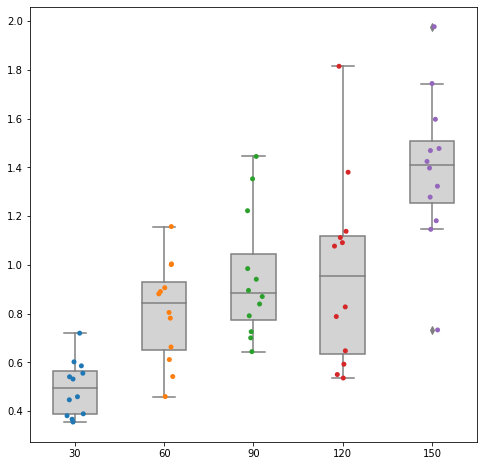

In [20]:
print(cov)
box_plot(cov)
plt.savefig("cov.jpg")

{30: [0.05414965986394557, 0.06897959183673469, 0.0801360544217687, 0.05047619047619047, 0.0620408163265306, 0.06639455782312925, 0.06476190476190477, 0.05795918367346939, 0.04789115646258503, 0.05986394557823129, 0.06149659863945577, 0.06204081632653061], 60: [0.048843537414965985, 0.030612244897959186, 0.031292517006802724, 0.03632653061224489, 0.06517006802721087, 0.02789115646258503, 0.026530612244897955, 0.041904761904761896, 0.0236734693877551, 0.034829931972789115, 0.05102040816326531, 0.03551020408163265], 90: [0.039047619047619046, 0.02993197278911564, 0.03265306122448979, 0.030612244897959176, 0.030340136054421762, 0.02204081632653061, 0.02680272108843537, 0.04897959183673469, 0.03346938775510203, 0.02598639455782313, 0.042721088435374144, 0.021904761904761903], 120: [0.028707482993197277, 0.03972789115646258, 0.03891156462585034, 0.03401360544217687, 0.024625850340136056, 0.024897959183673463, 0.019727891156462583, 0.04625850340136054, 0.03346938775510203, 0.0208163265306122

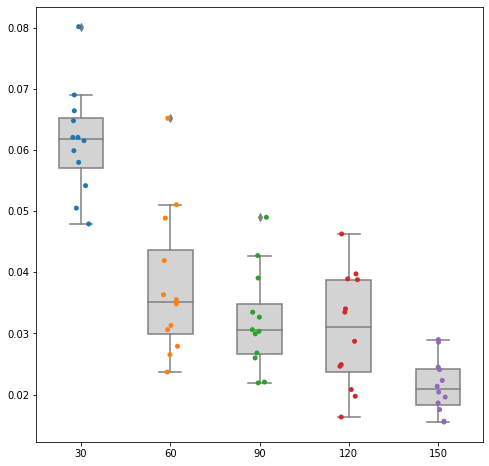

In [21]:
print(fmean)
box_plot(fmean)
plt.savefig("fmean.jpg")

In [22]:
##choose timepoints = 120

In [23]:
from statistics import mean
def index_dispersion(sdv):
    return calculate_sdv(sdv) / mean(sdv)

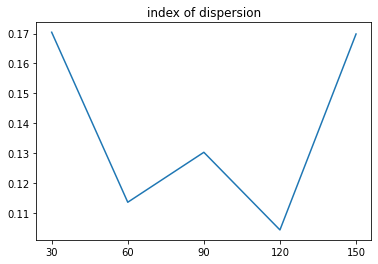

In [24]:
timepoints = [30, 60, 90, 120, 150]
plt.plot(timepoints, [index_dispersion(sdv[i]) for i in timepoints])
plt.xticks(timepoints)
plt.title("index of dispersion")
plt.show()

In [25]:
for i in timepoints:
    print("index of dispersion with timepoints " + str(i) + ": " + str(index_dispersion(sdv[i])))

index of dispersion with timepoints 30: 0.17046317803406993
index of dispersion with timepoints 60: 0.11354454650916032
index of dispersion with timepoints 90: 0.13026891662045145
index of dispersion with timepoints 120: 0.10427681402162287
index of dispersion with timepoints 150: 0.16987303249067437


In [23]:
###NEED TO CHANGE PARAMETERS

In [24]:
timepoints = 60
shifts = [1, 3, 5, 7, 10]
num_networks = 15

In [29]:
def flex_with_time_shifts(timepoints=60, splits=15, shifts=[1, 3, 5, 7, 10], drug_type = "SAL", path = "/Users/niva.ranavat/UCI Research/Data"):
    result_dict = defaultdict(list)
    for dir in Path(path).iterdir():
        if dir.is_dir():
            split_roi = [None] * len(shifts)
            drug = os.path.basename(dir)
            if drug.startswith(drug_type):
                type_drug = drug.split('_')[0]
                roi = load_txt(dir)
                threshold = calculate_threshold(roi)
                for i in range(len(shifts)):
                    split_roi[i] = split_roi_into_windows(roi, timepoints=timepoints, splits=splits, num_window=shifts[i])
                for i in range(len(shifts)):
                    corr = apply_threshold(split_roi[i], threshold)
                    graph_list = build_graph(corr, threshold)
                    flex = flexibility(graph_list)
                    print(drug,flex)
                    result_dict[drug].append((i, flex))
    return result_dict

In [40]:
#sal_dict = flex_with_time_shifts(timepoints, num_networks, shifts, "SAL", "/Users/niva.ranavat/UCI Research/Data" )
sal_dict = flex_with_time_shifts(90, 22, [5], "SAL", "/Users/niva.ranavat/UCI Research/Data" )


SAL_11 [0.0952381  0.14285714 0.0952381  0.0952381  0.14285714 0.04761905
 0.04761905 0.23809524 0.19047619 0.19047619 0.14285714 0.0952381
 0.0952381  0.0952381  0.0952381  0.23809524 0.42857143 0.14285714
 0.14285714 0.0952381  0.14285714 0.04761905 0.04761905 0.19047619
 0.14285714 0.04761905 0.23809524 0.14285714 0.23809524 0.23809524
 0.23809524 0.04761905 0.23809524 0.0952381  0.19047619 0.19047619
 0.0952381  0.19047619 0.14285714 0.0952381  0.0952381  0.14285714
 0.0952381  0.23809524 0.14285714 0.14285714 0.19047619 0.14285714
 0.0952381  0.14285714 0.14285714 0.19047619 0.14285714 0.0952381
 0.04761905 0.0952381  0.14285714 0.14285714 0.14285714 0.19047619
 0.28571429 0.19047619 0.19047619 0.23809524 0.0952381  0.04761905
 0.0952381  0.0952381  0.14285714 0.23809524 0.04761905 0.0952381
 0.23809524 0.0952381  0.04761905 0.0952381  0.14285714 0.23809524
 0.14285714 0.04761905 0.14285714 0.04761905 0.0952381  0.04761905
 0.14285714 0.04761905 0.0952381  0.0952381  0.04761905 0.

This will ensure that the comparison is equal for all groups. Once you have this then plot the same as before standard deviation and index of dispersion, from these we will choose a paradigm for the experimental groups. 


we’ll do the SAL with the proper parameters and then we’ll do cocaine and MDPV with the same parameters and well plot the flexibility index for all thee in one plot and then we’ll have something to go forward.

In [27]:
##CHANGE TIME SHIFTS

{5: [0.06778799967527294, 0.06512271107770587, 0.07326458675555043, 0.07117131805000916, 0.07002573043282406, 0.06702548937344328, 0.06482723129099091, 0.0894066553037168, 0.06798692684790379, 0.06569511260824297, 0.07816489344260263, 0.07114582486036498]}


<Figure size 720x720 with 0 Axes>

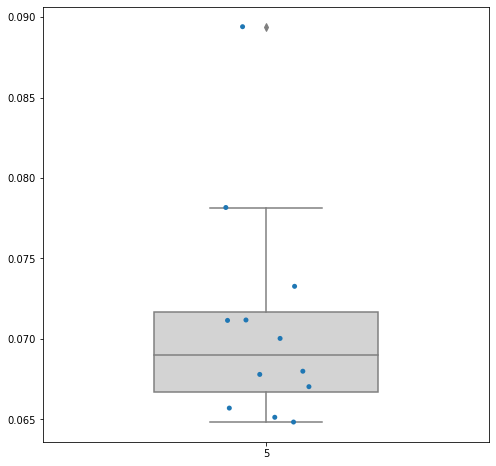

In [35]:
shifts = [5]
sdv, cov, fmean = tp_dict(sal_dict, shifts)
box_plot(sdv)
plt.savefig("sdv_timeshifts.jpg")
print(sdv)

{5: [0.6066255652758801, 0.8655550206530528, 0.5329871784757134, 0.7072228765221733, 0.6526066593591592, 0.5526970982365089, 0.756317698394894, 0.6673719530964644, 0.7284313590846835, 0.4880651054621825, 0.7599364640253035, 0.8149430847641808]}


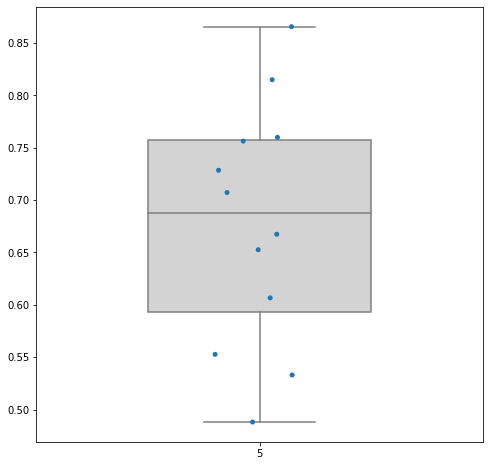

In [36]:
box_plot(cov)
plt.savefig("cov_timeshifts.jpg")
print(cov)

{5: [0.11174603174603173, 0.07523809523809523, 0.13746031746031745, 0.1006349206349206, 0.1073015873015873, 0.12126984126984124, 0.0857142857142857, 0.13396825396825396, 0.09333333333333334, 0.13460317460317459, 0.10285714285714284, 0.0873015873015873]}


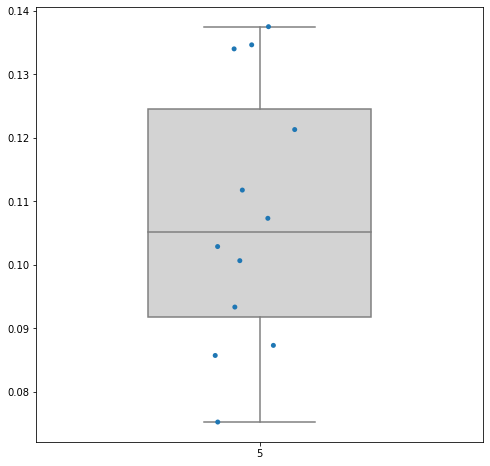

In [34]:
print(fmean)
box_plot(fmean)
plt.savefig("fmean_timeshifts.jpg")

In [31]:
#timepoints = 60 shifts = 1

In [32]:
timepoints = 60
num_networks = 90
shifts = [1]

In [33]:
sal_dict = flex_with_time_shifts(timepoints, num_networks, shifts, "SAL")
mdpv_dict = flex_with_time_shifts(timepoints, num_networks, shifts, "MDPV")
coc_dict = flex_with_time_shifts(timepoints, num_networks, shifts, "COC")

In [34]:
sal = defaultdict(list)
mdpv = defaultdict(list)
coc = defaultdict(list)
total_drug = defaultdict(list)
for drug_type, list_flex in sal_dict.items():
    sal[drug_type] = list_flex[0][1]
    total_drug["SAL"] = np.append(total_drug["SAL"], sal[drug_type])
for drug_type, list_flex in mdpv_dict.items():
    mdpv[drug_type] = list_flex[0][1]
    total_drug["MDPV"] = np.append(total_drug["MDPV"], mdpv[drug_type])
for drug_type, list_flex in coc_dict.items():
    coc[drug_type] = list_flex[0][1]
    total_drug["COC"] = np.append(total_drug["COC"], coc[drug_type])

In [35]:
total_drug

defaultdict(list,
            {'SAL': array([0.01123596, 0.06741573, 0.04494382, ..., 0.05617978, 0.02247191,
                    0.        ]),
             'MDPV': array([0.06741573, 0.04494382, 0.01123596, ..., 0.02247191, 0.01123596,
                    0.03370787]),
             'COC': array([0.02247191, 0.04494382, 0.02247191, ..., 0.        , 0.05617978,
                    0.05617978])})

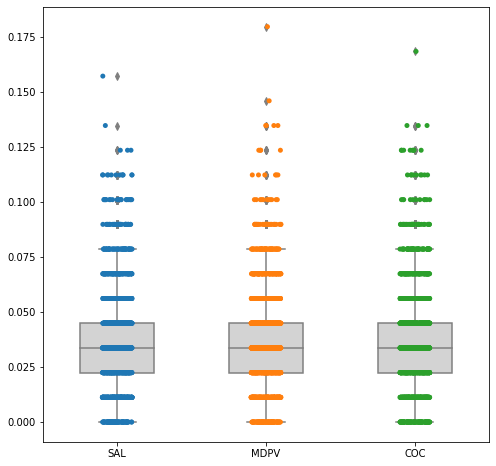

In [36]:
box_plot(total_drug)